# Diabetes Prediction
## What is Diabetes?
Diabetes adalah penyakit kronis yang terjadi ketika pankreas tidak lagi mampu memproduksi insulin, atau ketika tubuh tidak dapat memanfaatkan insulin yang dihasilkannya dengan baik. Mempelajari cara menggunakan Machine Learning dapat membantu kita memprediksi Diabetes. Mari kita mulai!


## About this project :- 

- Tujuan dari proyek ini adalah memprediksi apakah seseorang menderita diabetes atau tidak. 
- Dataset terdiri atas beberapa variabel medis dan variabel outcome 
- Variabel independent pada dataset ini adalah :-'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'
- Variabel Outcome adalah 1 or 0 mengindikasikan seseorang diabetes (1) atau tidak(0).

## About the Dataset

- Pregnancies :- Berapa kali seseorang hamil
- Glucose :- Plasma Glucose concentration of 2 hours in an oral glucose tolerance test
- BloodPressure :- Diastollic Blood Pressure (mm hg)
- SkinThickness :- Triceps skin fold thickness(mm)
- Insulin :- 2 jam serum insulin(mu U/ml)
- BMI :- Body Mass Index ((weight in kg/height in m)^2)
- Age :- umur (tahun)
- DiabetesPedigreeFunction :-kecenderungan diabetes berdasarkan sejarah keluarga) 
- Outcome :- 0(tidak memiliki diabetes) or 1 (memiliki diabetes)

# 1. Import Required Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #to plot charts
import seaborn as sns #used for data visualization
import warnings #avoid warning flash
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 2. Loading the dataset 

In [2]:
df=pd.read_csv(r'C:\\Users\\PPL2\\Documents\\Private\\Model\\Pacmann Data Science\\Project\\Project XIII/diabetes.csv')

# 3. Exploratory Data Analysis
## a. Understanding the dataset
- Head of the dataset
- Shape of the data set
- Types of columns
- Information about data set
- Summary of the data set

In [3]:
df.head() #get familier with dataset, display the top 5 data records

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape #getting to know about rows and columns we're dealing with - 768 rows , 9 columns

(768, 9)

In [5]:
df.columns #learning about the columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.dtypes #knowledge of data type helps for computation

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
df.info() #Print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe() #helps us to understand how data has been spread across the table.
# count :- the number of NoN-empty rows in a feature.
# mean :- mean value of that feature.
# std :- Standard Deviation Value of that feature.
# min :- minimum value of that feature.
# max :- maximum value of that feature.
# 25%, 50%, and 75% are the percentile/quartile of each features. 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### **CONCLUSION** :- WDapat kita lihat bahwa nilai minimum dari beberapa kolom adalah 0 yang secara medis adalah tidak mungking. Sehingga dalam data cleaning kita harus menggantinya dengan median/mean tergantung daripada distribusi. Dari tabel ini juga ditemukan bahwa tingkat insulin bisa mencapai 846. Kita harus melakukan treatment terhadap outlier..

## b. Data Cleaning
- Dropping duplicate values
- Checking NULL values
- Checking for 0 value and replacing it :- It isn't medically possible for some data record to have 0 value such as Blood Pressure or Glucose levels. Hence we replace them with the mean value of that particular column.

Read more about this here :- https://towardsdatascience.com/the-ultimate-guide-to-data-cleaning-3969843991d4

In [9]:
#dropping duplicate values - checking if there are any duplicate rows and dropping if any
df=df.drop_duplicates()

In [10]:
#check for missing values, count them and print the sum for every column
df.isnull().sum() #conclusion :- there are no null values in this dataset

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
#checking for 0 values in 5 columns , Age & DiabetesPedigreeFunction do not have have minimum 0 value so no need to replace , also no. of pregnancies as 0 is possible as observed in df.describe
print(df[df['BloodPressure']==0].shape[0])
print(df[df['Glucose']==0].shape[0])
print(df[df['SkinThickness']==0].shape[0])
print(df[df['Insulin']==0].shape[0])
print(df[df['BMI']==0].shape[0])

35
5
227
374
11


### NOTE :-
hanya glukosa dan tekanan darah yang terdistribusi normal, sisanya skewed dan mempunyai outliers. Untuk glukosa dan tekanan darah, kita mengganti nilai 0 dengan nilai rata-rata. SkinThickness, Insulin,BMI memiliki distribusi skewed sehingga median adalah pilihan yang lebih baik karena lebih tidak terdampak oleh outlier.

In [12]:
#replacing 0 values with median of that column
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())#normal distribution
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())#normal distribution
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())#skewed distribution
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())#skewed distribution
df['BMI']=df['BMI'].replace(0,df['BMI'].median())#skewed distribution

# 4. Statisik Deskriptif dan Inferential
## Here we are going to plot :-
- Histograms :- to see if data is normally distributed or skewed
- Box Plot :- to analyse the distribution and see the outliers
- Scatter plots :- to understand relationship between any two variables
- Pair plot :- to create scatter plot between all the variables

### a. Statistik Deskriptif

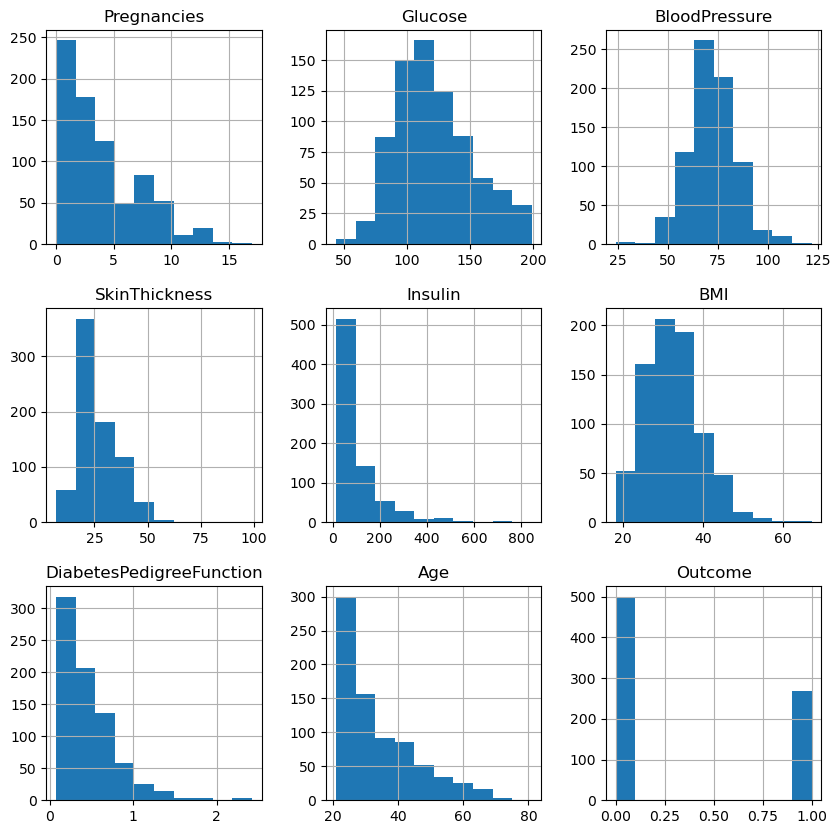

In [13]:
#histogram for each  feature
df.hist(bins=10,figsize=(10,10))
plt.show()

### **Conclusion** :- hanya glukosa dan tekanan darah yang terdistribusi normal,  sisanya skewed dan mempunyai outliers

<Axes: xlabel='DiabetesPedigreeFunction'>

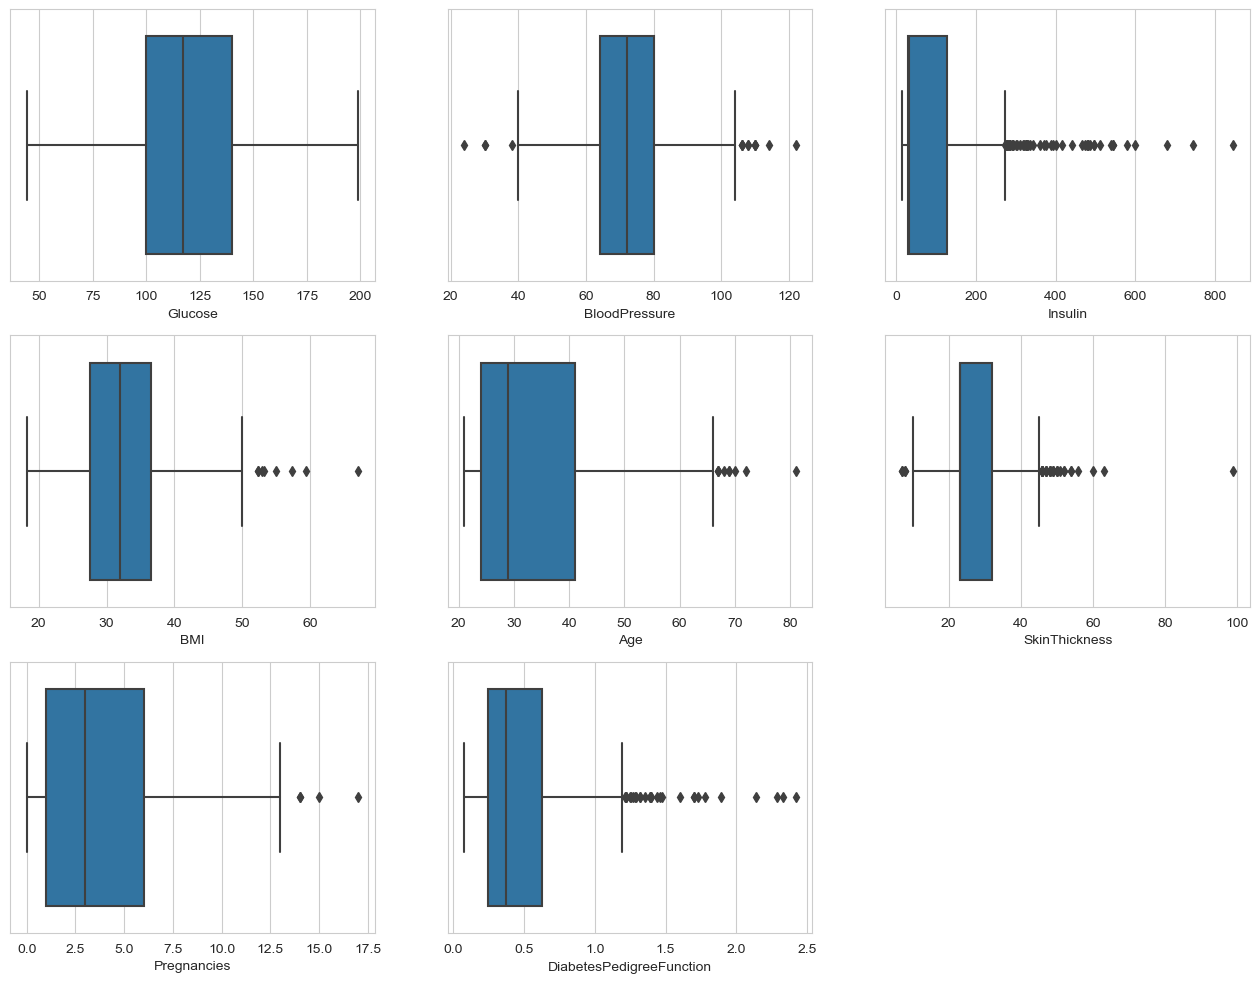

In [14]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=df)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=df)

Outliers are unusual values in your dataset, and they can distort statistical analyses and violate their assumptions. Hence it is of utmost importance to deal with them. In this case removing outliers can cause data loss so we have to deal with it using various scaling and transformation techniques.

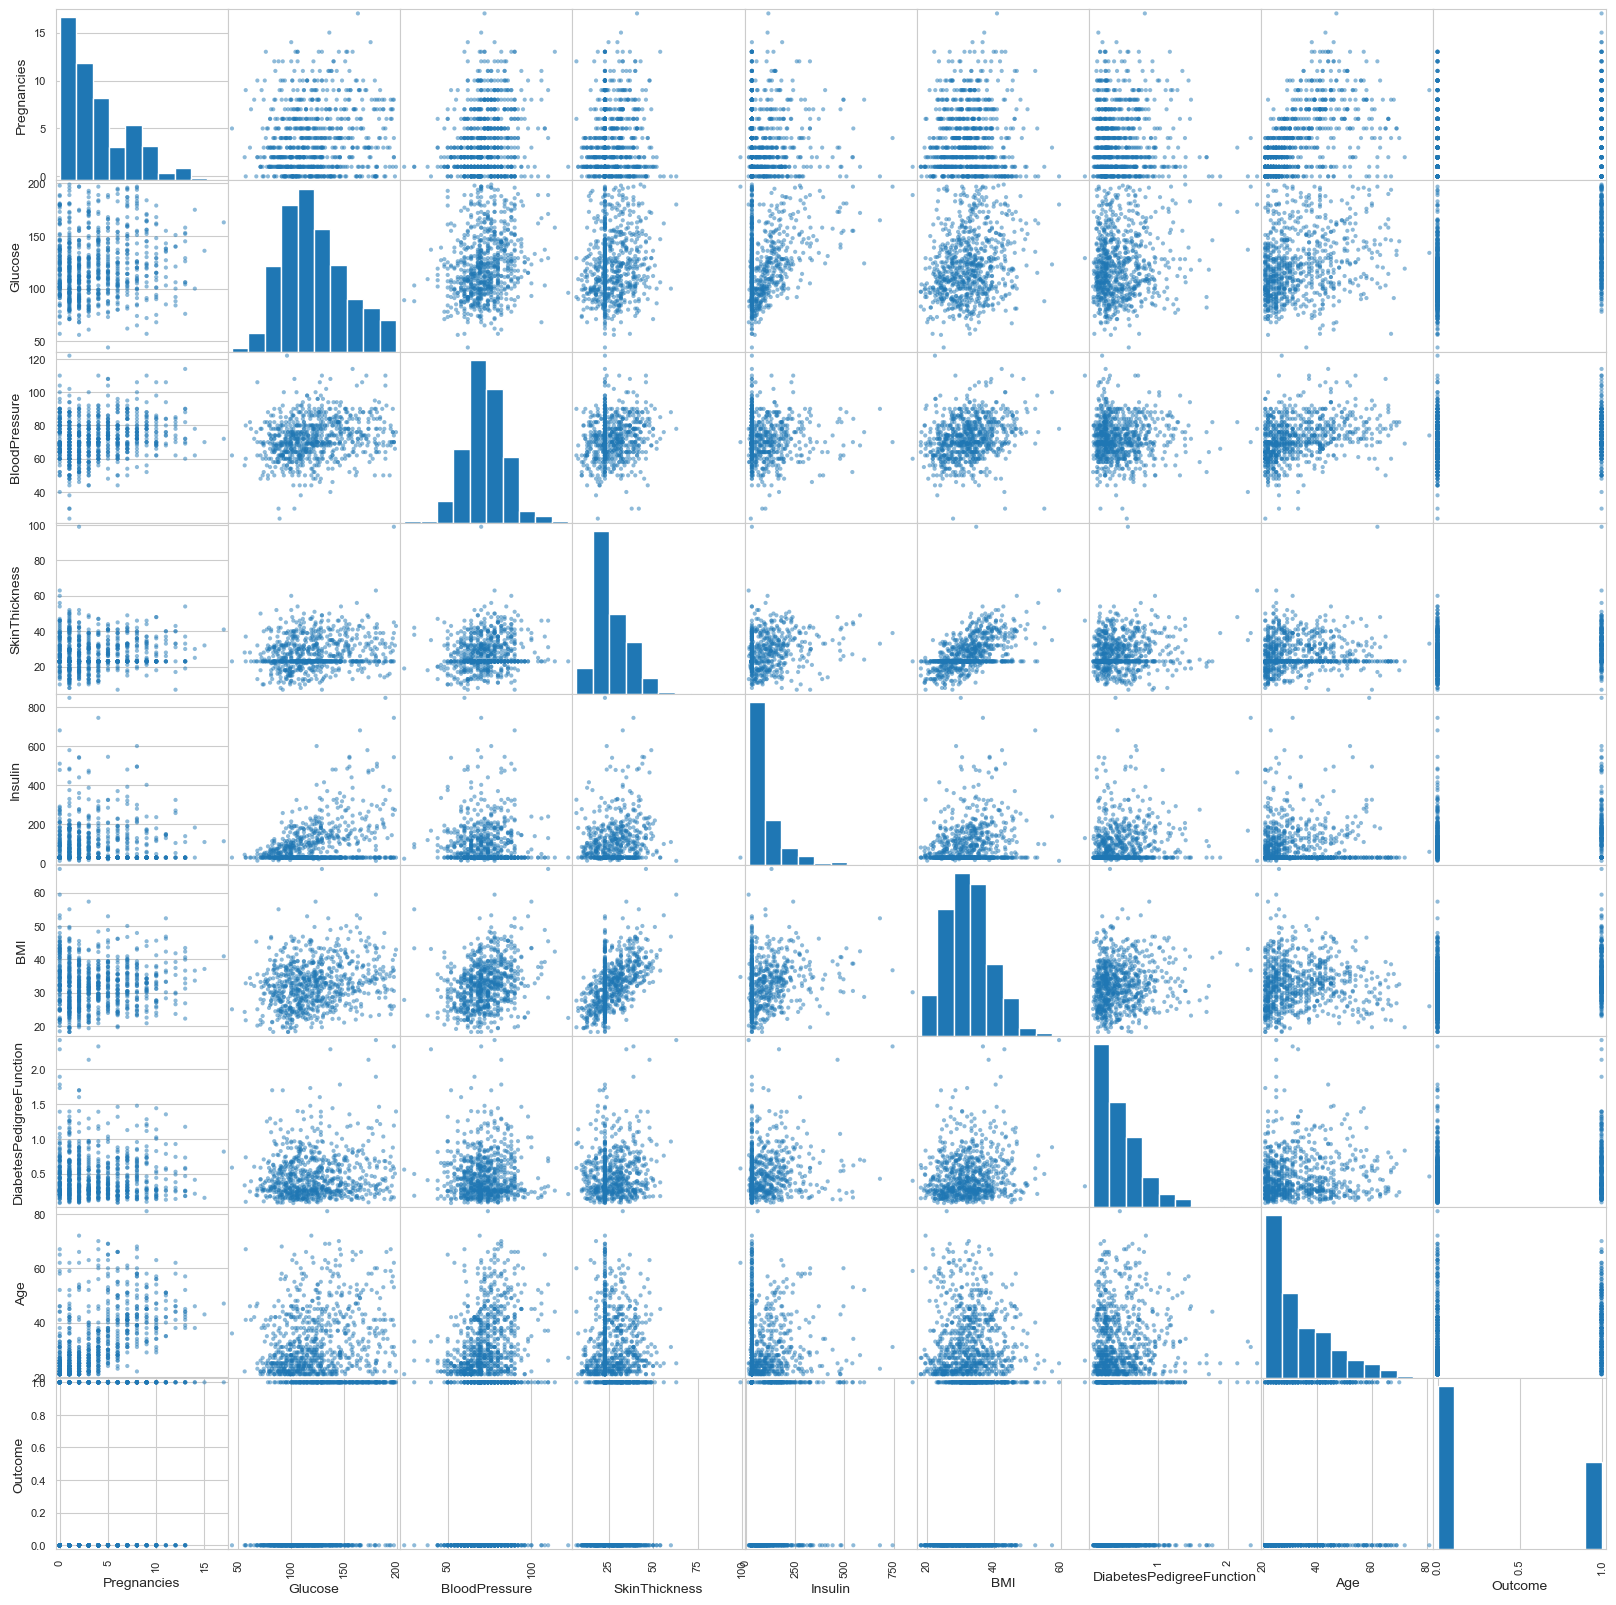

In [15]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(20,20));
# we can come to various conclusion looking at these plots for example  if you observe 5th plot in pregnancies with insulin, you can conclude that women with higher number of pregnancies have lower insulin

### Age and Outcome correlation

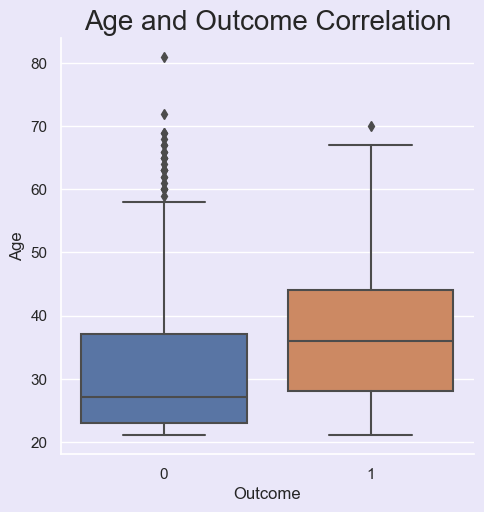

In [16]:
sns.set(rc={"axes.facecolor":"#EAE7F9","figure.facecolor":"#EAE7F9"})
p=sns.catplot(x="Outcome",y="Age", data=df, kind='box')
plt.title("Age and Outcome Correlation", size=20, y=1.0);

### Glucose and Outcome Correlation

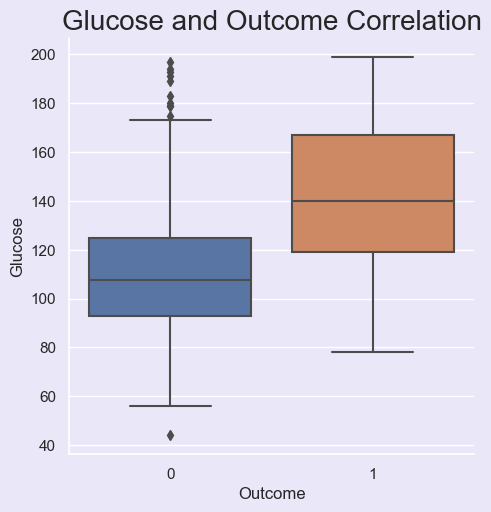

In [17]:
sns.set(rc={"axes.facecolor":"#EAE7F9","figure.facecolor":"#EAE7F9"})
p=sns.catplot(x="Outcome",y="Glucose", data=df, kind='box')
plt.title("Glucose and Outcome Correlation", size=20, y=1.0);

### Correlation between attributes

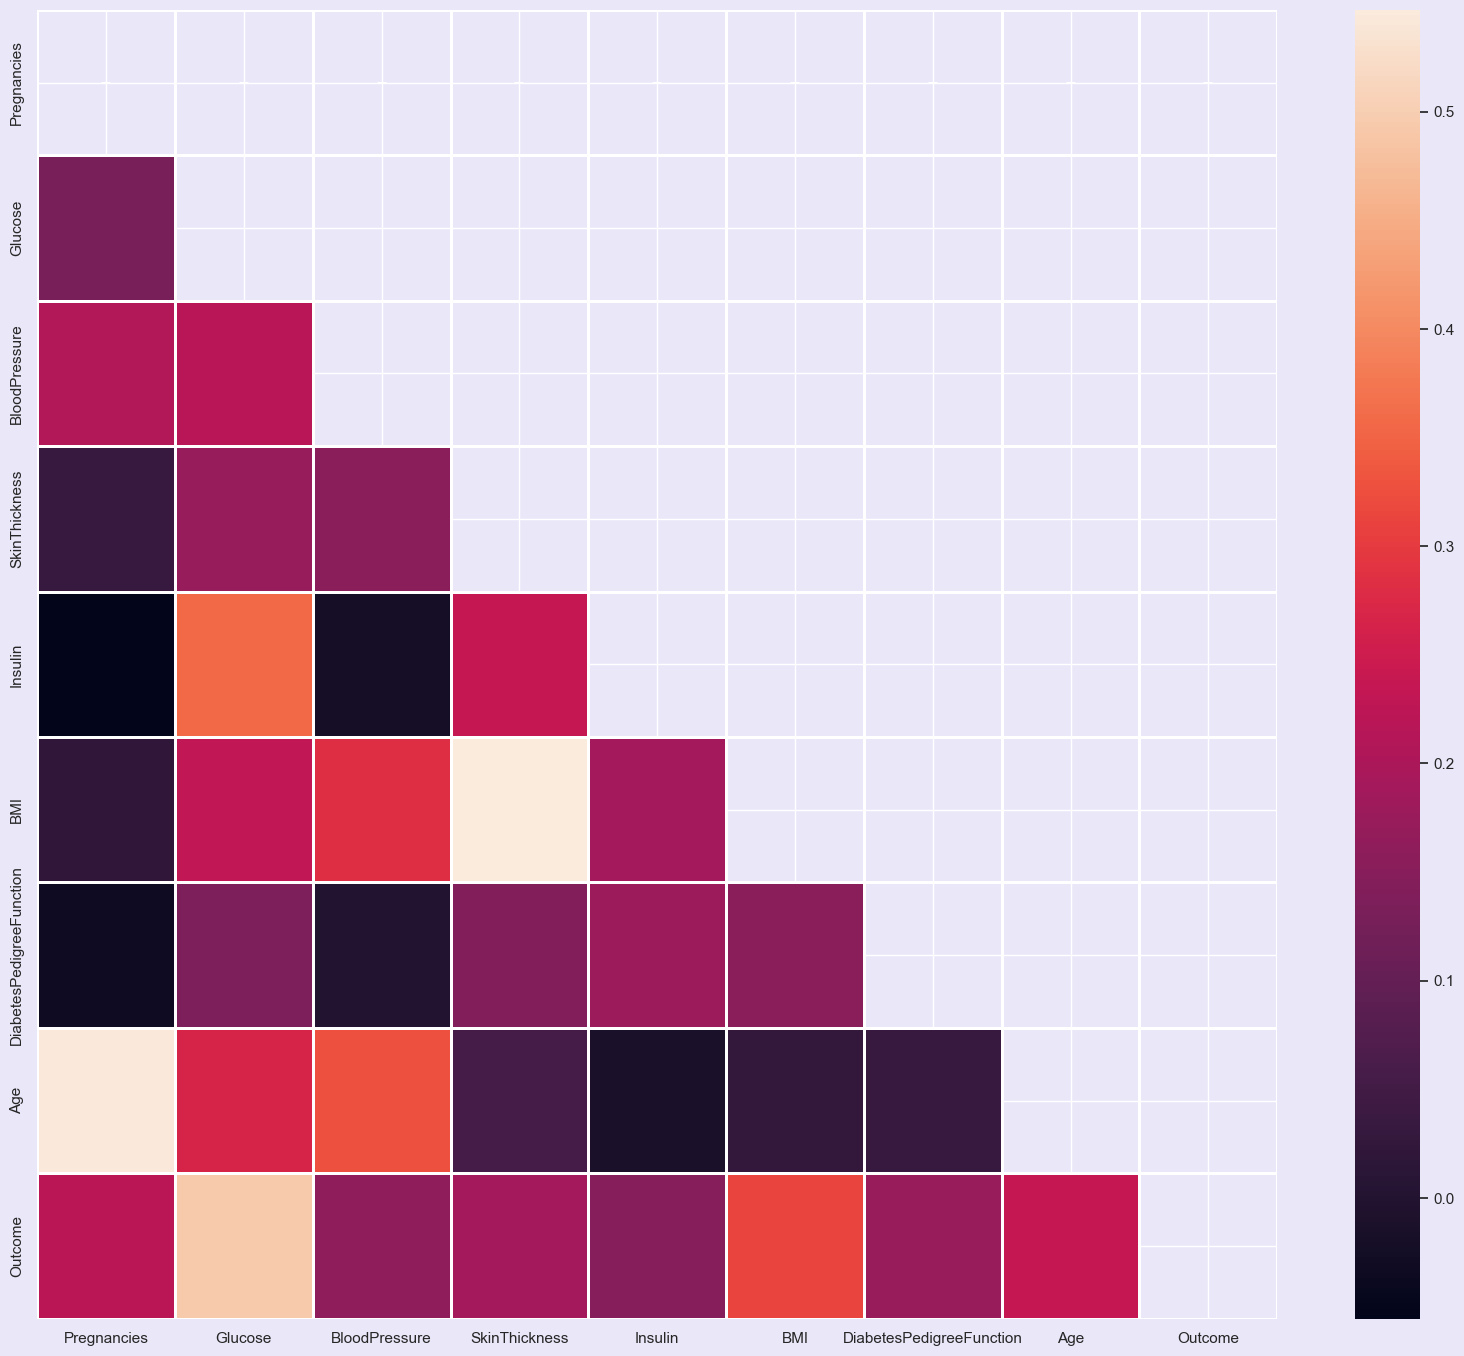

In [18]:
plt.figure(figsize=(20, 17))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, linewidth=.8, mask=matrix, cmap="rocket");

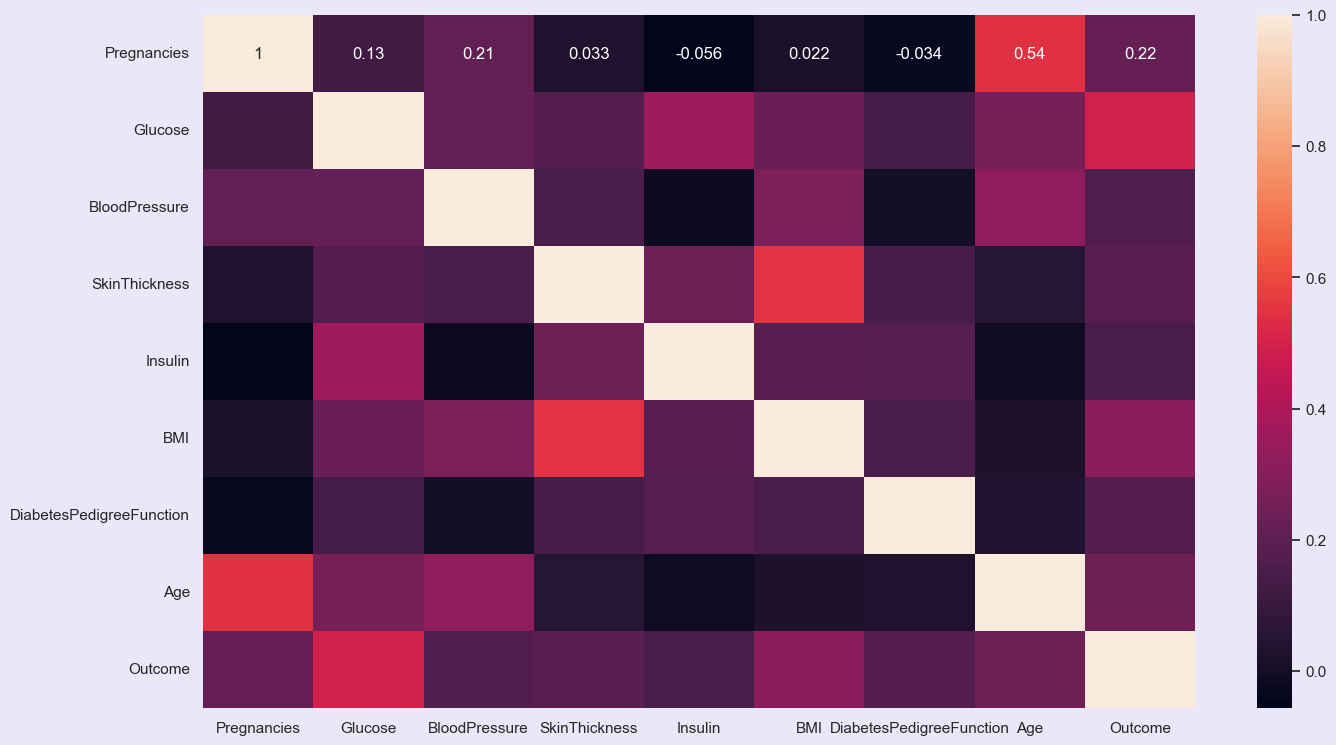

In [19]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(), annot=True);

In [20]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    return cat_cols, num_cols, cat_but_car
cat_cols, num_cols, cat_but_car = grab_col_names(df)



         Outcome      Ratio
Outcome                    
0            500  65.104167
1            268  34.895833


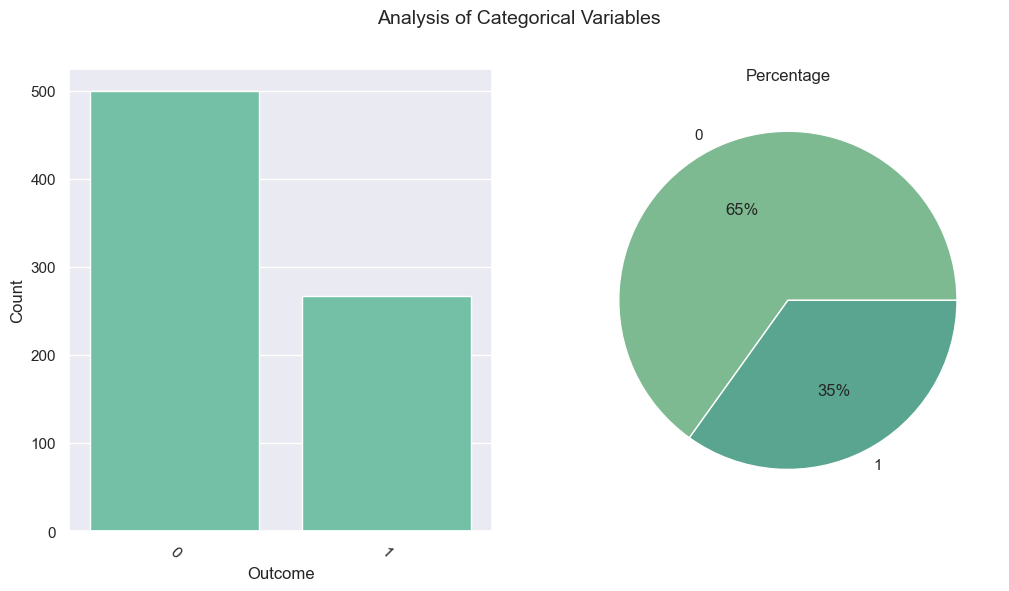

In [21]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    if plot:
        sns.set_style("darkgrid")
        fig, ax = plt.subplots(1, 2)
        ax = np.reshape(ax, (1, 2))
        ax[0, 0] = sns.countplot(x=dataframe[col_name], color="mediumaquamarine", ax=ax[0, 0])
        ax[0, 0].set_ylabel('Count')
        ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=-45)
        ax[0, 1] = plt.pie(dataframe[col_name].value_counts().values, labels=dataframe[col_name].value_counts().keys(),
                           colors=sns.color_palette('crest'), autopct='%.0f%%')
        plt.title("Percentage")
        fig.set_size_inches(12, 6)
        fig.suptitle('Analysis of Categorical Variables', fontsize=14)
        plt.show()
for col in cat_cols:
    cat_summary(df, col, plot=True)

In [22]:
dff=df.copy()

              BMI_Cat      Ratio
BMI_Cat                         
ObesityLVL1       232  30.208333
Overweight        180  23.437500
ObesityLVL2       148  19.270833
NormalWeight      108  14.062500
ObesityLVL3        96  12.500000
UnderWeight         4   0.520833


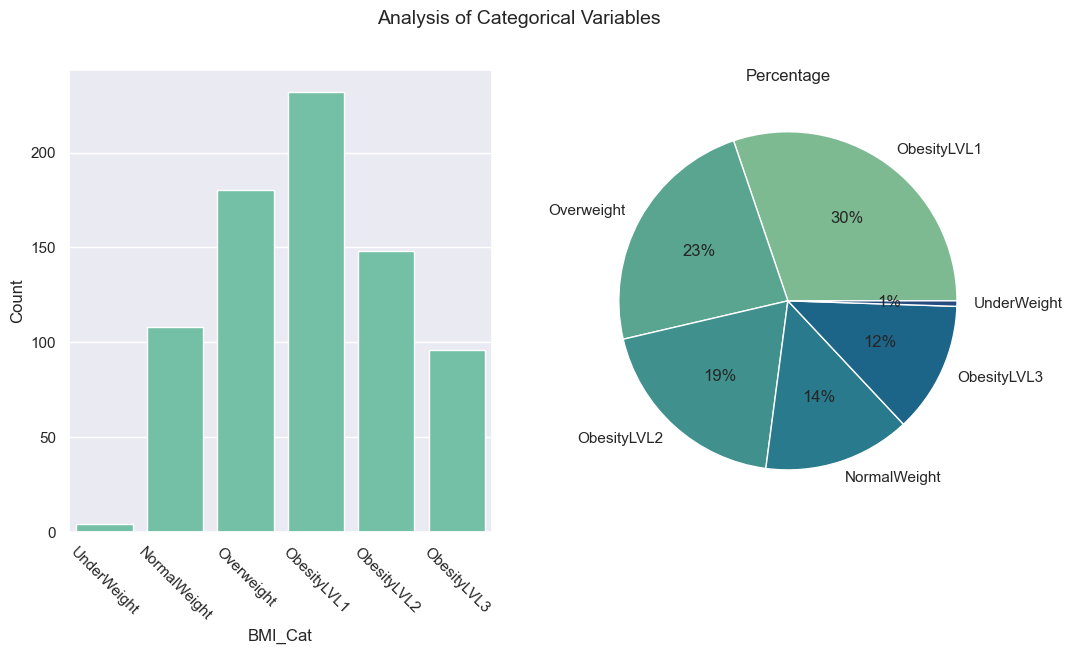

In [23]:
# labeling bmi based on body mass index (BMI) informations
bmi_labels = ["UnderWeight", "NormalWeight", "Overweight", "ObesityLVL1", "ObesityLVL2", "ObesityLVL3"]
dff['BMI_Cat'] = pd.cut(dff['BMI'], [-1, 18.5, 25, 30, 35, 40, dff['BMI'].max()], 
                       labels=bmi_labels)
cat_summary(dff,"BMI_Cat", plot=True)

Berdasarkan data yang tersedia pada ilmu medis, kita bisa mengklasifikasikan dataset kita seperti di atas dan melihat berapa banyak data dalam setiap kategori. UnderWeight Count < ObesityLVL3 Count < NormalWeight Count < ObesityLVL2 Count < Overweight Count < ObesityLVL3 Count


             New_Age_Cat      Ratio
New_Age_Cat                        
Young                396  51.562500
Mature               291  37.890625
Senior                81  10.546875


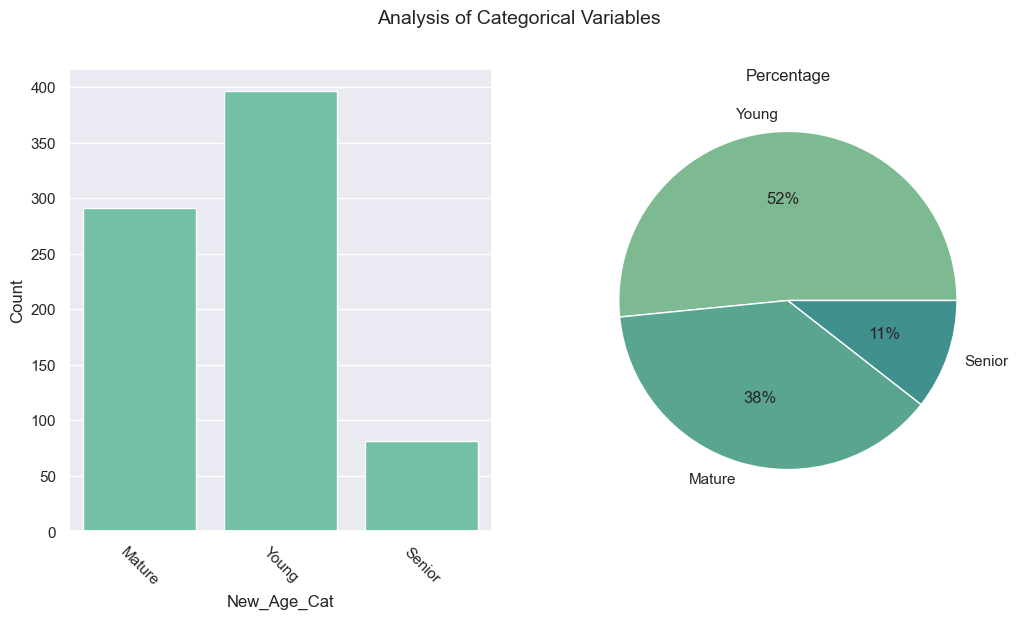

In [24]:
dff["New_Age_Cat"] = dff["Age"].apply(lambda x: "Young" if x < 30 else ("Mature" if 30 <= x <= 50 else "Senior"))
cat_summary(dff,"New_Age_Cat", plot=True)

we have classified our dataset as above to young age, mature & senior & we can see that how many of our datas, are in which categories. Senior Count < Mature Count < Young Count


             GlucoseCat      Ratio
GlucoseCat                        
Normal              571  74.348958
Prediabetes         197  25.651042


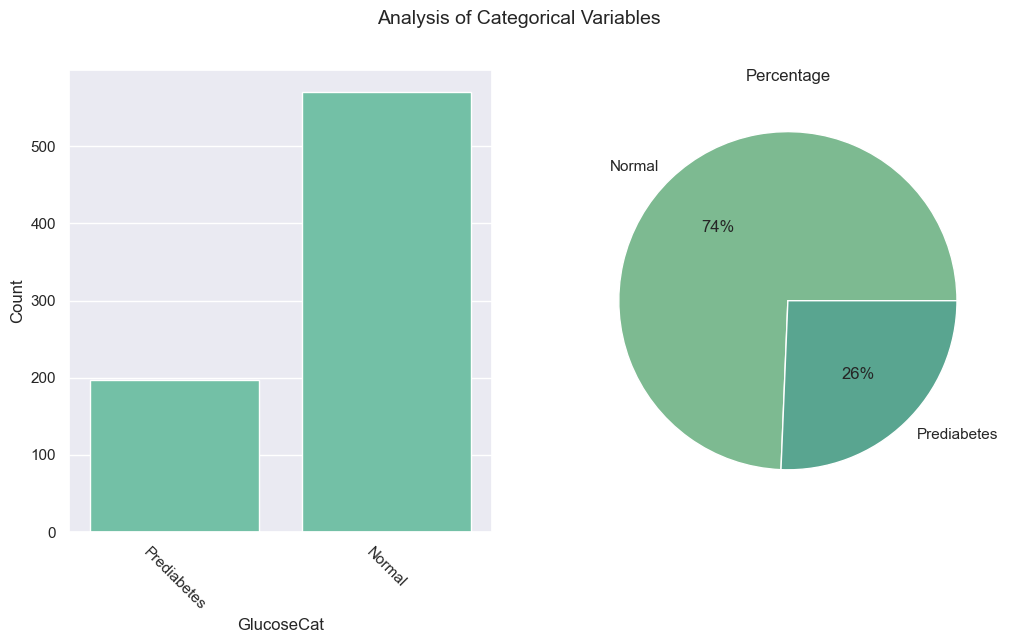

In [25]:
dff["GlucoseCat"] = dff["Glucose"].apply(lambda x: "Normal" if x < 140 else ("Prediabetes" if 140 <= x <= 200 else "diabetes"))
cat_summary(dff,"GlucoseCat", plot=True)

Kadar gula darah kurang dari 140 mg/dL (7,8 mmol/L) adalah normal. Angka lebih dari 200 mg/dL (11,1 mmol/L) setelah dua jam mengindikasikan diabetes. Angka antara 140 dan 199 mg/dL (7,8 mmol/L dan 11,0 mmol/L) menunjukkan pradiabetes. dengan bantuan data yang tersedia dalam ilmu kedokteran, kami telah mengklasifikasikan kumpulan data kami seperti di atas & kami dapat melihat berapa banyak data kami, yang termasuk dalam kategori apa. Jumlah Pradiabetes < Jumlah Normal

                     BloodPressureCat      Ratio
BloodPressureCat                                
Optimal                           603  78.515625
HighNormal                         68   8.854167
Normal                             59   7.682292
Grade1_Hypertension                25   3.255208
Grade2_Hypertension                11   1.432292
Grade3_Hypertension                 2   0.260417


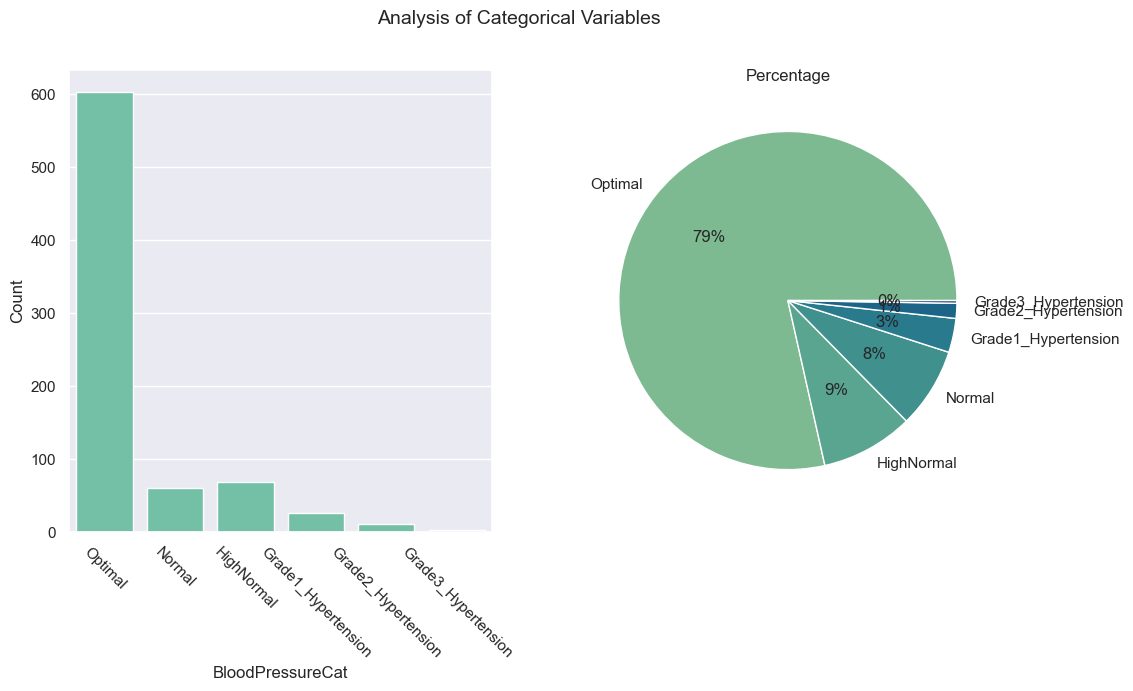

In [26]:
# labeling based on medical informations available
bp_labels = ["Optimal", "Normal", "HighNormal", "Grade1_Hypertension", "Grade2_Hypertension", "Grade3_Hypertension"]
dff['BloodPressureCat'] = pd.cut(dff['BloodPressure'], [-1, 80,  85, 90, 100, 110, dff['BloodPressure'].max()], labels=bp_labels)
cat_summary(dff,"BloodPressureCat", plot=True)

Grade3_Hypertension Count < Grade2_Hypertension Count < Normal Count < HighNormal Count < Optimal Count

### b. Statistik Inferensial

### Pertanyaan 1
Research Question : What proportion of people reported that they have diabetes?

Target Population: Whole Population

Parameter of Interest: Proportion

In [27]:
sample_size_pregnant = df[df['Outcome'] == 1]['Outcome'].count()
total_size = df.shape[0]
unbiased_point_estimate = np.round(sample_size_pregnant / total_size,100)
unbiased_point_estimate

0.3489583333333333

In [28]:
Margin_of_error = 1.96 * np.sqrt(unbiased_point_estimate * (1-unbiased_point_estimate)/total_size)
Margin_of_error

0.03371061227097312

In [29]:
lcb = unbiased_point_estimate - Margin_of_error
ucb = unbiased_point_estimate + Margin_of_error
(lcb,ucb)

(0.3152477210623602, 0.3826689456043064)

Kami memperkirakan dengan keyakinan 95%, bahwa proporsi penduduk perempuan yang hamil diperkirakan antara 31% hingga 38%. Artinya, dengan keyakinan 95%, kami memperkirakan 32% hingga 38% wanita hamil berdasarkan jumlah sampel kami yaitu 768.

Pertanyaan 2

Research Question: What is the average number of preganancy for a diabetic patient?

Target Population: Preganant Females having diabetes

Parameter of Interest: Average Month of pregnancy

In [30]:
unbiased_point_estimate = df[df.Outcome == 1]['Pregnancies'].mean()
std = df[df.Outcome == 1]['Pregnancies'].std()
(unbiased_point_estimate ,std)

(4.865671641791045, 3.741239044041554)

So according to our population the unbiased point estimate is 0.35, that means 35% of population in our sample reported that they are preganant

Margin of error = z * standard error

standard error = sqrt(p-hat*(1-p-hat/total_size))

In [31]:
Margin_of_error = 1.96 * std/np.sqrt(sample_size_pregnant)
Margin_of_error

0.44792379331037774

In [32]:
lcb = unbiased_point_estimate - Margin_of_error
ucb = unbiased_point_estimate + Margin_of_error
(lcb,ucb)

(4.417747848480667, 5.313595435101423)

Kami memperkirakan dengan tingkat keyakinan interval 95% bahwa rata-rata jumlah kehamilan pasien diabetes berkisar antara  4.41 sampai 5.31

Pertanyaan 3

Research Question: What is the average month of pregnancy for a non-diabetic patient

Target Population: Pregnant females(Non-Diabetic)

Parameter of Interest: Average month for pregnancy

In [33]:
unbiased_point_estimate = df[df.Outcome == 0]['Pregnancies'].mean()
std = df[df.Outcome == 0]['Pregnancies'].std()
(unbiased_point_estimate , std)

(3.298, 3.01718458262189)

In [34]:
Margin_of_error = 1.96 * std/np.sqrt(df[df.Outcome == 0]['Outcome'].count())
Margin_of_error

0.26446788923434955

In [35]:
lcb = unbiased_point_estimate - Margin_of_error
ucb = unbiased_point_estimate + Margin_of_error
(lcb,ucb)

(3.0335321107656505, 3.5624678892343495)

With 95% confidence,the population mean of total number of pregnancies for a non-diabetic patient is estimated to be in between 3.03 to 3.56, we can observe here that it is clearly distinct with the average number of pregnancies for a diabetic patient(4.41 , 5.31). If the number of pregnancies is equal or more than 4, we can estimate that it's a diabetic patient.

Below the python code to find out the above results


In [36]:
import statsmodels.api as sm
sm.stats.DescrStatsW(df[df.Outcome == 0]['Pregnancies']).zconfint_mean()

(3.033536970425177, 3.562463029574823)


untuk memperkuat observasi, kita bisa mencari rata-rata perbedaan antara kehamilan pada pasien diabetes dan non diabetes 

Research Question: Find the average pregnancy difference for diabetic and non-diabetic patient

Population of Interest: Pregnant Females

Parameter of Interest: (U1 - U2):Pregnancies

Note that 1 = Diabetic,2 = Non-Diabetic


In [37]:
std1 = df[df.Outcome == 1]['Pregnancies'].std()
std2 = df[df.Outcome == 0]['Pregnancies'].std()
(std1**2 , std2**2)

(13.996869584660962, 9.10340280561123)

In [38]:
mean1 = df[df.Outcome == 1]['Pregnancies'].mean()
mean2 = df[df.Outcome == 0]['Pregnancies'].mean()
print(mean1 - mean2)

n1 = df[df.Outcome == 1]['Pregnancies'].count()
n2 = df[df.Outcome == 0]['Pregnancies'].count()

(n1,n2)

1.567671641791045


(268, 500)

In [39]:
t_star = 1.98
Margin_of_error = t_star*np.sqrt(std1**2/n1 + std**2/n2)
Margin_of_error

0.5254799547144376

In [40]:
lcb = (mean1 - mean2) - Margin_of_error
ucb = (mean1 - mean2) + Margin_of_error
(lcb,ucb)

(1.0421916870766075, 2.0931515965054825)

In [41]:


Margin_of_error = t_star * np.sqrt(((n1 - 1)*std1**2 + (n2 - 1)*std2**2)/(n1 + n2 - 2)) * np.sqrt(1/n1 + 1/n2)
Margin_of_error



0.49281957244554303



Here we can see that using both the approaches we get almost same result, and that's the good thing as our results are more robust. So, with 95% confidence interval, the population mean difference between the number of pregnancies for a diabetic patient is estimated to be 1,o4 to 2.09 more than the non-diabetic patient.


In [42]:
lcb = (mean1 - mean2) - Margin_of_error
ucb = (mean1 - mean2) + Margin_of_error
(lcb,ucb)

(1.074852069345502, 2.060491214236588)

Kita juga bisa mengkonfirmasi hasilnya dengan menggunakan uji hipotesis

Research Question: Is there a significant difference between the number of pregnancies for a diabetic ad non diabetic patient

H0

: mu1 - mu2 = 0

H1
: mu1 - mu2 ≠

0

significance level = 0.05

Test-statistic = Best estimate - Hypothesised result / standard error

Test-statistic: A measure of how far our sample statistic is from our hypothesized population parameter, in terms of estimated standard errors. The farther away our sample statistic is, the less confident we will be in our null hypothesised value

Assumptions:

    Data dikumpulkan melalui random sampling.
    Distribusi normal atau jumlah sampel cukup besar untuk menggunakan konsep central limit theorem


In [43]:
import scipy.stats.distributions as dist

best_estimate = mean1 - mean2
std_error = np.sqrt(std1**2/n1 + std**2/n2)
test_statistic = best_estimate/std_error
p_val = 2*dist.norm.cdf(-np.abs(test_statistic))
(test_statistic , p_val)

(5.9069614794974905, 3.484751922877582e-09)

In [44]:
best_estimate = mean1 - mean2
std_error = np.sqrt(((n1 - 1)*std1**2 + (n2 - 1)*std2**2)/(n1 + n2 - 2)) * np.sqrt(1/n1 + 1/n2)
test_statistic = best_estimate/std_error
p_val = 2*dist.norm.cdf(-np.abs(test_statistic))
(test_statistic , p_val)

(6.29843055003515, 3.006743856829338e-10)

Kita bisa lihat bahwa nilai p-value di bawah level signifikan, berarti kita memiliki cukup evidence untuk menolak null hypothesis. Berdasarkan perkiraan perbedaan sampel berarti kita mempunyai cukup evidence untuk mendukung bahwa terdapat perbedaan antara rata-rata jumlah kehamilan untuk pasien diabtest dan non diabetes.

In [45]:
sm.stats.ztest(df[df.Outcome == 1]['Pregnancies'] , df[df.Outcome == 0]['Pregnancies'])

(6.298430550035151, 3.006743856829293e-10)

# 5. Feature Selection dan Pemisahan Data

### Feature Selection

**Pearson's Correlation Coefficient** : Helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

In [62]:
#corrmat=df.corr()
#sns.heatmap(corrmat, annot=True)

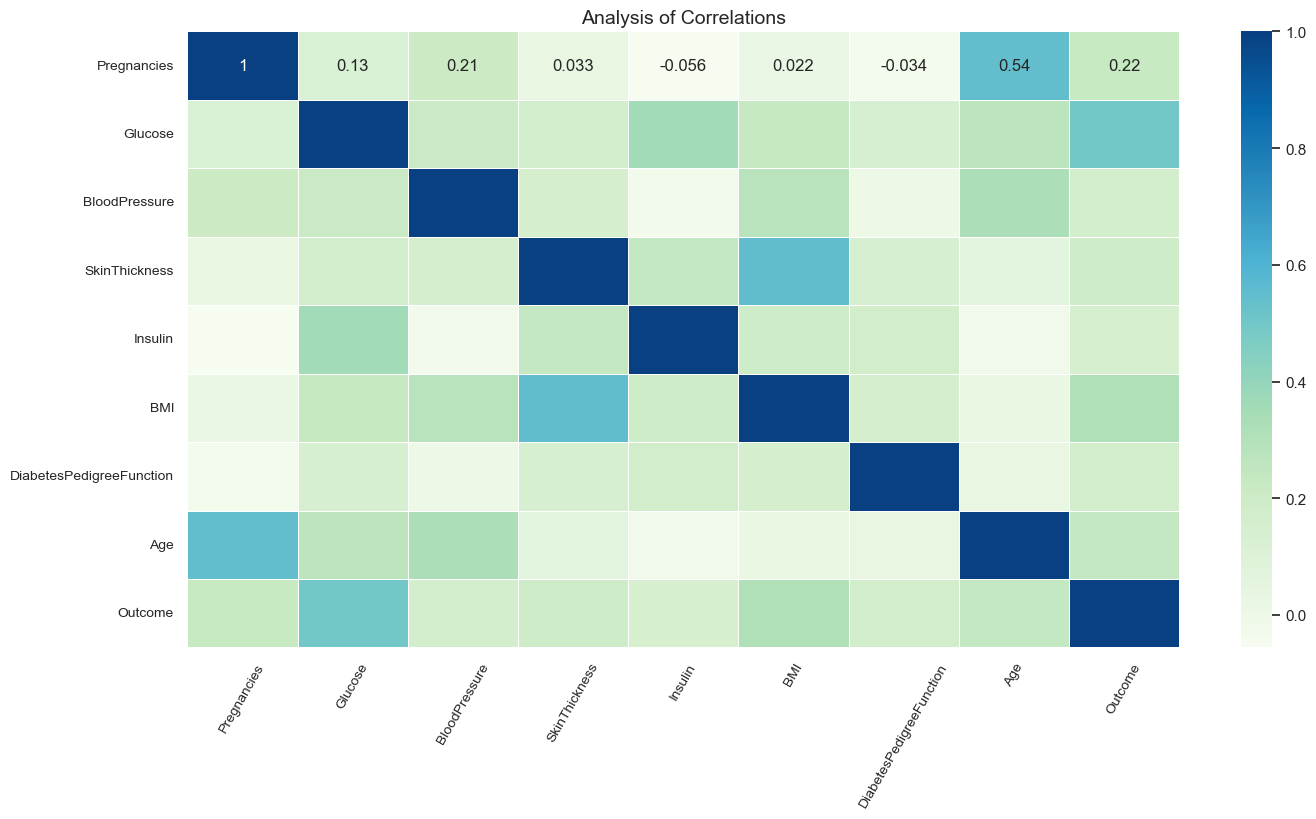

In [63]:
def correlated_map(dataframe, plot=False):
    corr = dataframe.corr()
    if plot:
        sns.set(rc={'figure.figsize': (16, 8)})
        sns.heatmap(corr, cmap="GnBu", annot=True, linewidths=.6)
        plt.xticks(rotation=60, size=10)
        plt.yticks(size=10)
        plt.title('Analysis of Correlations', size=14)
        plt.show()
correlated_map(df, plot=True)

CONCLUSION : Kita bisa melihat bahwa Glucose, BMI and Age adalah yang paling terkorelasi dengan Outcome BloodPressure, Insulin, DiabetesPedigreeFunction adalah yang paling sedikit terkorelasi dan tidak berkontribusi banyak kepada model sehingga bisa kita drop

In [64]:
df_selected=df.drop(['BloodPressure','Insulin','DiabetesPedigreeFunction'],axis='columns')

### Handling Outliers 

**1 — What is an Outlier?**

An outlier is a data point in a data set that is distant from all other observations.

**2 — How can we Identify an outlier?**

- Using Box plots

- Using Scatter plot

- Using Z score

I've used Box Plots above in data visualization step to detect outliers.

**3 — How am I treating the outliers ?**

Quantile Transformer :- This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme. 

Lets do a simple Standard Scaler vs Quantile Transformation. Given this data set:- 

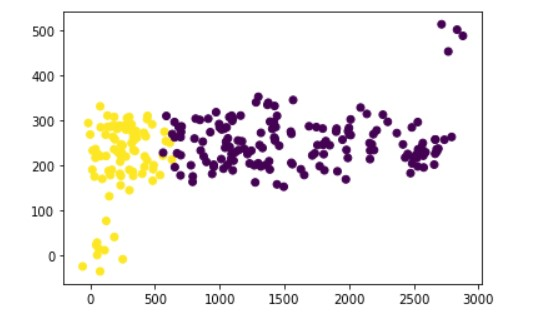

We perform StandardScaler() on this and get

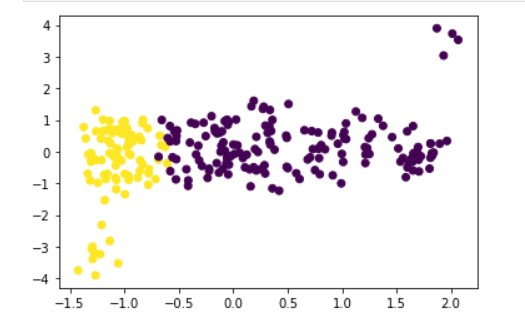

The Y-axis has 8 units whereas X-axis has only 3.5 units, indicating that Outliers have affected the scales

After applying Quantile Transformation , we get 

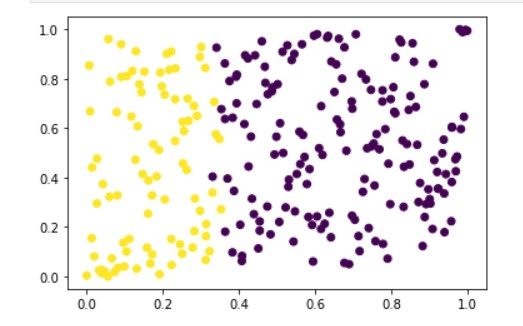

The Y-axis and X-axis are equally scaled. The outliers are still present in this dataset but their impact has been reduced. One of these examples has led me to use this transformer.


In [65]:
from sklearn.preprocessing import QuantileTransformer
x=df_selected
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
df_new=quantile.transform(X)
df_new=pd.DataFrame(X)
df_new.columns =['Pregnancies', 'Glucose','SkinThickness','BMI','Age','Outcome']
df_new.head()

,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
0,0.747718,0.810300,0.801825,0.591265,0.889831,1.0
1,0.232725,0.091265,0.644720,0.213168,0.558670,0.0
2,0.863755,0.956975,0.357888,0.077575,0.585398,1.0
3,0.232725,0.124511,0.357888,0.284224,0.000000,0.0
4,0.000000,0.721643,0.801825,0.926988,0.606258,1.0


<Axes: xlabel='SkinThickness'>

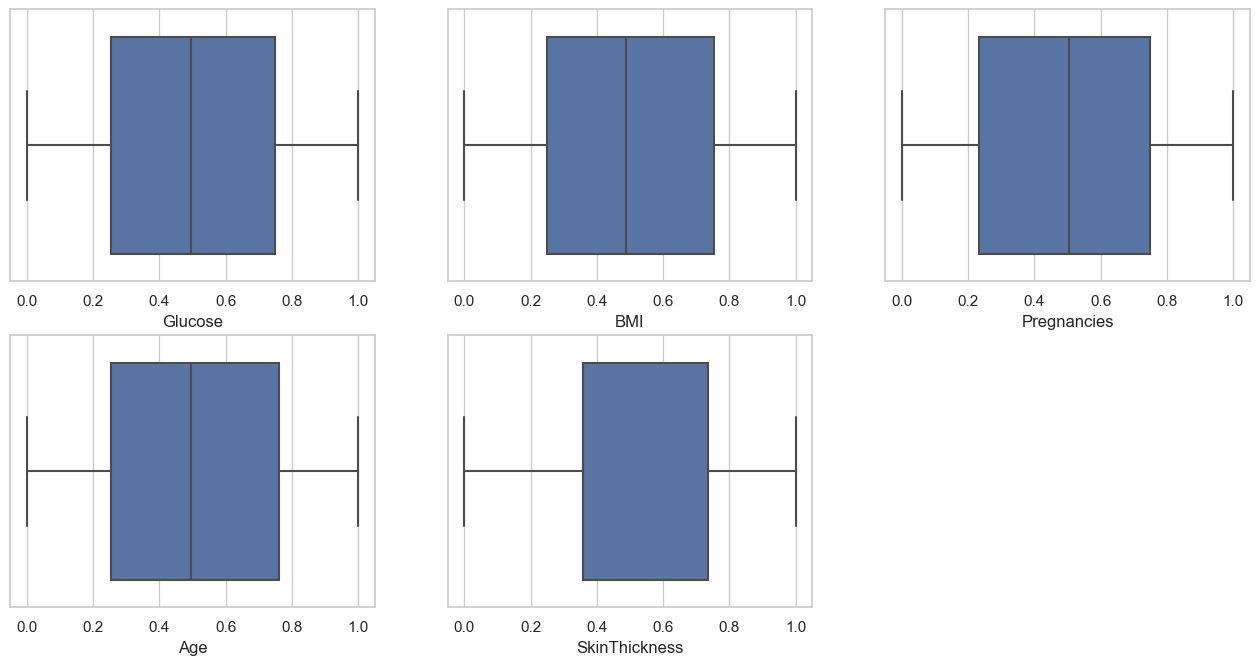

In [66]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x=df_new['Glucose'],data=df_new)
plt.subplot(3,3,2)
sns.boxplot(x=df_new['BMI'],data=df_new)
plt.subplot(3,3,3)
sns.boxplot(x=df_new['Pregnancies'],data=df_new)
plt.subplot(3,3,4)
sns.boxplot(x=df_new['Age'],data=df_new)
plt.subplot(3,3,5)
sns.boxplot(x=df_new['SkinThickness'],data=df_new)

### Split the Data Frame into X and y

In [67]:
target_name='Outcome'
y= df_new[target_name]#given predictions - training data 
X=df_new.drop(target_name,axis=1)#dropping the Outcome column and keeping all other columns as X

In [68]:
X.head() # contains only independent features 

,Pregnancies,Glucose,SkinThickness,BMI,Age
0,0.747718,0.810300,0.801825,0.591265,0.889831
1,0.232725,0.091265,0.644720,0.213168,0.558670
2,0.863755,0.956975,0.357888,0.077575,0.585398
3,0.232725,0.124511,0.357888,0.284224,0.000000
4,0.000000,0.721643,0.801825,0.926988,0.606258


In [69]:
y.head() #contains dependent feature

0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Outcome, dtype: float64

### Train Test Split

- The train-test split is a technique for evaluating the performance of a machine learning algorithm.

- Train Dataset: Used to fit the machine learning model.
- Test Dataset: Used to evaluate the fit machine learning model.

- Common split percentages include:

Train: 80%, Test: 20%

Train: 67%, Test: 33%

Train: 50%, Test: 50%

I've used 80% train and 20% test

Read more about it here :- https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=0)#splitting data in 80% train, 20%test

In [71]:
X_train.shape,y_train.shape

((614, 5), (614,))

In [72]:
X_test.shape,y_test.shape

((154, 5), (154,))

# 6. Classification Algorithms

- KNN
- Naive Bayes
- SVM
- Decision Tree
- Random Forest
- Logistic Regression

### Modeling meliputi :-

#### a. Hyper Parameter Tuning using GridSearch CV
#### b. Fit Best Model
#### c. Predict on testing data using that model
#### d. Performance Metrics :- Confusion Matrix, F1 Score, Precision Score, Recall Score
**Confusion Matrix**
It is a tabular visualization of the model predictions versus the ground-truth labels. 

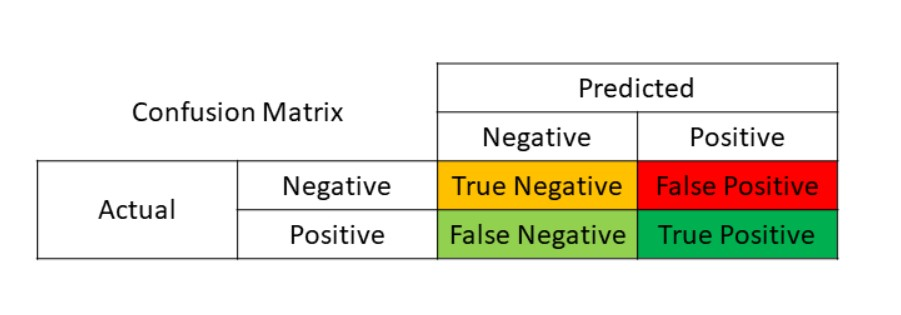

**F1 Score :-**
It’s the harmonic mean between precision and recall. 

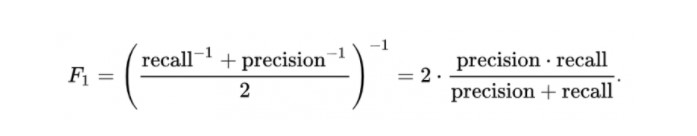

**Precision Score**
Precision is the fraction of predicted positives/negatives events that are actually positive/negatives.

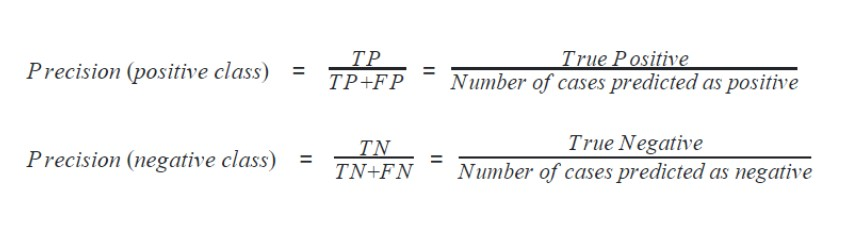


**Recall Score**
It is the fraction of positives/negative events that you predicted correctly. 

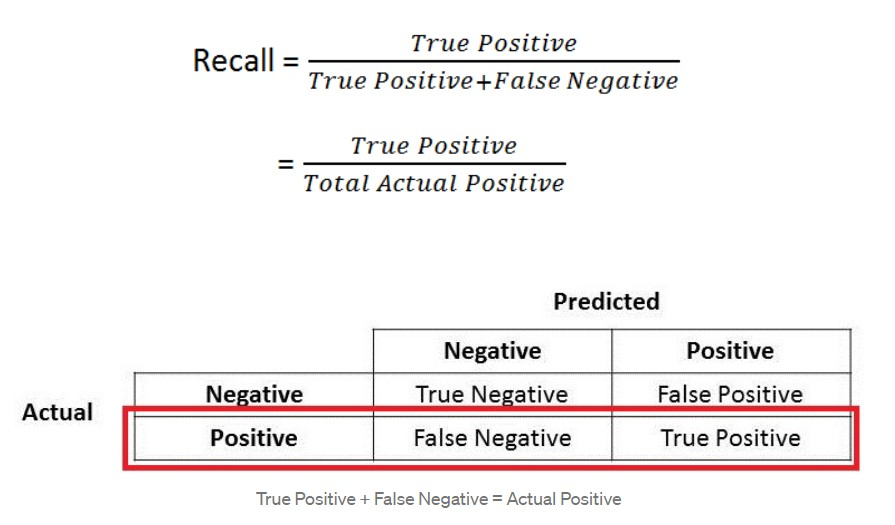

#### Preferensi diberikan pada F1 Scoring karena :- 

1. When you have a small positive class, then F1 score makes more sense.In this case the positive class number is almost half of the negative class.

2. F1-score is a better metric when there are imbalanced classes as in the above case.

3. F1 Score might be a better measure to use if we need to seek a balance between Precision and Recall

Reference :- https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/



## A. K Nearest Neighbours :-

KNN algorithm, is a non-parametric algorithm that classifies data points based on their proximity and association to other available data.

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

In [74]:
#List Hyperparameters to tune
knn= KNeighborsClassifier()
n_neighbors = list(range(15,25))
p=[1,2]
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

#convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, p=p,weights=weights,metric=metric)

#Making model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=knn, param_grid=hyperparameters, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

In [75]:
best_model = grid_search.fit(X_train,y_train)

In [76]:
#Best Hyperparameters Value
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 30
Best p: 1
Best n_neighbors: 19


In [77]:
#Predict testing set
knn_pred = best_model.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.85      0.88      0.86       107
         1.0       0.70      0.64      0.67        47

    accuracy                           0.81       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.80      0.81      0.80       154


 F1:
 0.6666666666666666

 Precision score is:
 0.6976744186046512

 Recall score is:
 0.6382978723404256

 Confusion Matrix:



<Axes: >

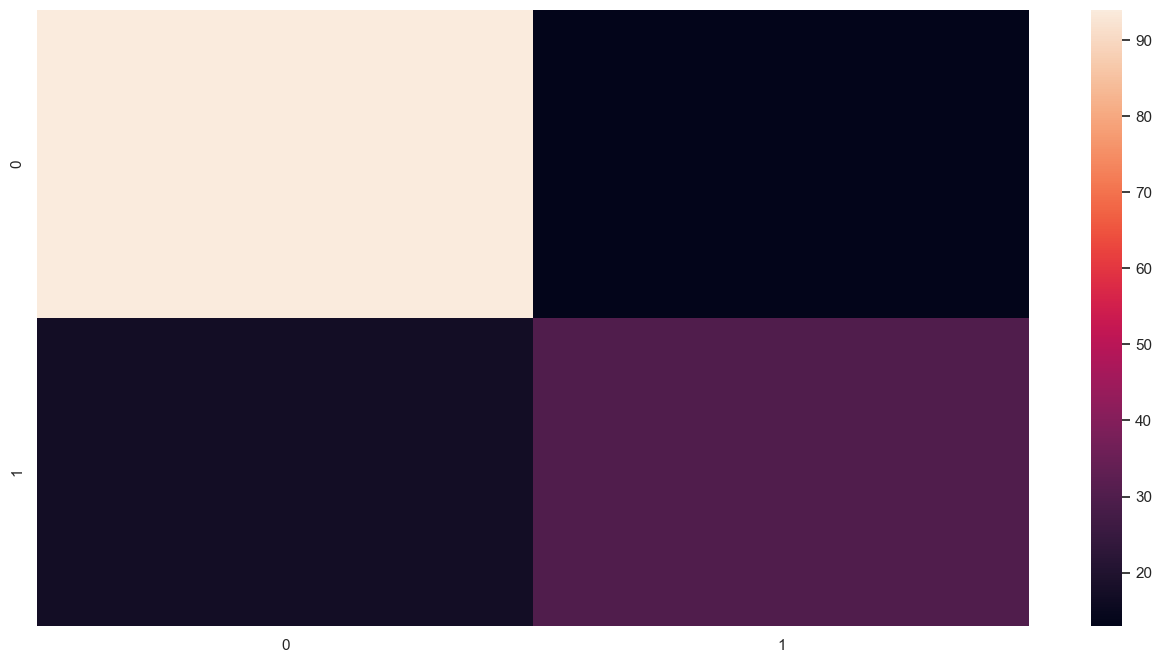

In [78]:
print("Classification Report is:\n",classification_report(y_test,knn_pred))
print("\n F1:\n",f1_score(y_test,knn_pred))
print("\n Precision score is:\n",precision_score(y_test,knn_pred))
print("\n Recall score is:\n",recall_score(y_test,knn_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,knn_pred))

## B. Naive Bayes :-

Naive Bayes is classification approach that adopts the principle of class conditional independence from the Bayes Theorem. This means that the presence of one feature does not impact the presence of another in the probability of a given outcome, and each predictor has an equal effect on that result

In [79]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

param_grid_nb = {
    'var_smoothing': np.logspace(0,-2, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)

In [80]:
best_model= nbModel_grid.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [81]:
nb_pred=best_model.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.81      0.87      0.84       107
         1.0       0.64      0.53      0.58        47

    accuracy                           0.77       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.76      0.77      0.76       154


 F1:
 0.5813953488372093

 Precision score is:
 0.6410256410256411

 Recall score is:
 0.5319148936170213

 Confusion Matrix:



<Axes: >

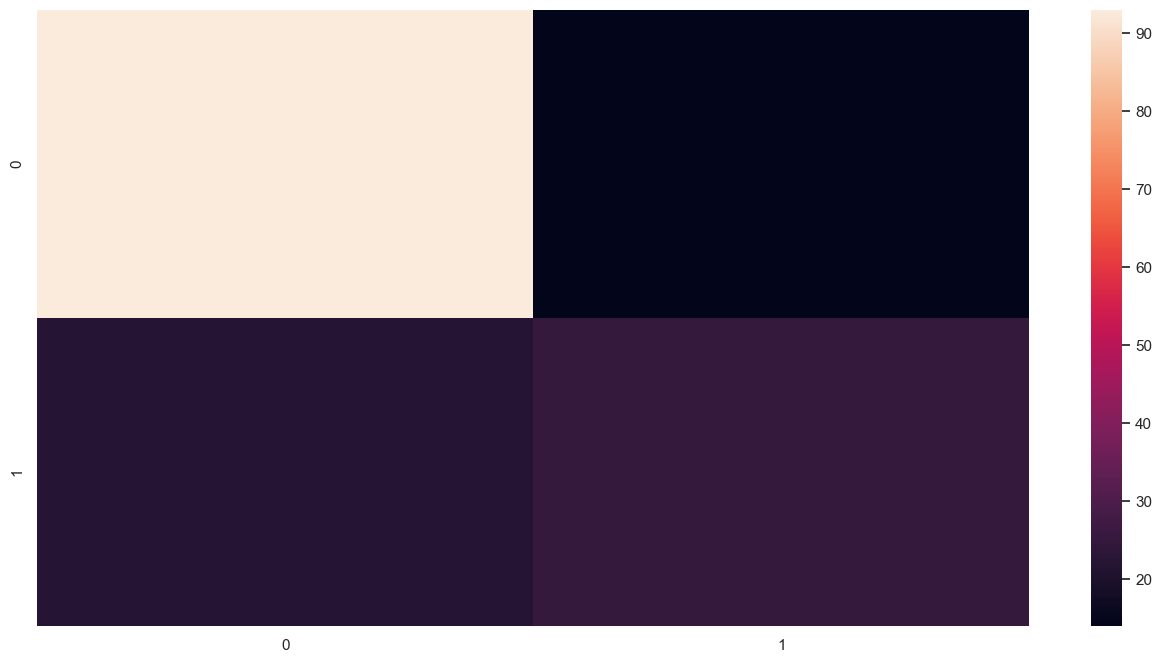

In [82]:
print("Classification Report is:\n",classification_report(y_test,nb_pred))
print("\n F1:\n",f1_score(y_test,nb_pred))
print("\n Precision score is:\n",precision_score(y_test,nb_pred))
print("\n Recall score is:\n",recall_score(y_test,nb_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,nb_pred))

# C. Support Vector Machine :- 

It is typically leveraged for classification problems, constructing a hyperplane where the distance between two classes of data points is at its maximum. This hyperplane is known as the decision boundary, separating the classes of data points (e.g., has diabetes vs doesn't have diabetes ) on either side of the plane.

In [83]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score

In [84]:
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

In [85]:
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

In [86]:
grid_result = grid_search.fit(X, y)

In [87]:
svm_pred=grid_result.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.86      0.89      0.88       107
         1.0       0.73      0.68      0.70        47

    accuracy                           0.82       154
   macro avg       0.80      0.78      0.79       154
weighted avg       0.82      0.82      0.82       154


 F1:
 0.6666666666666666

 Precision score is:
 0.6976744186046512

 Recall score is:
 0.6382978723404256

 Confusion Matrix:



<Axes: >

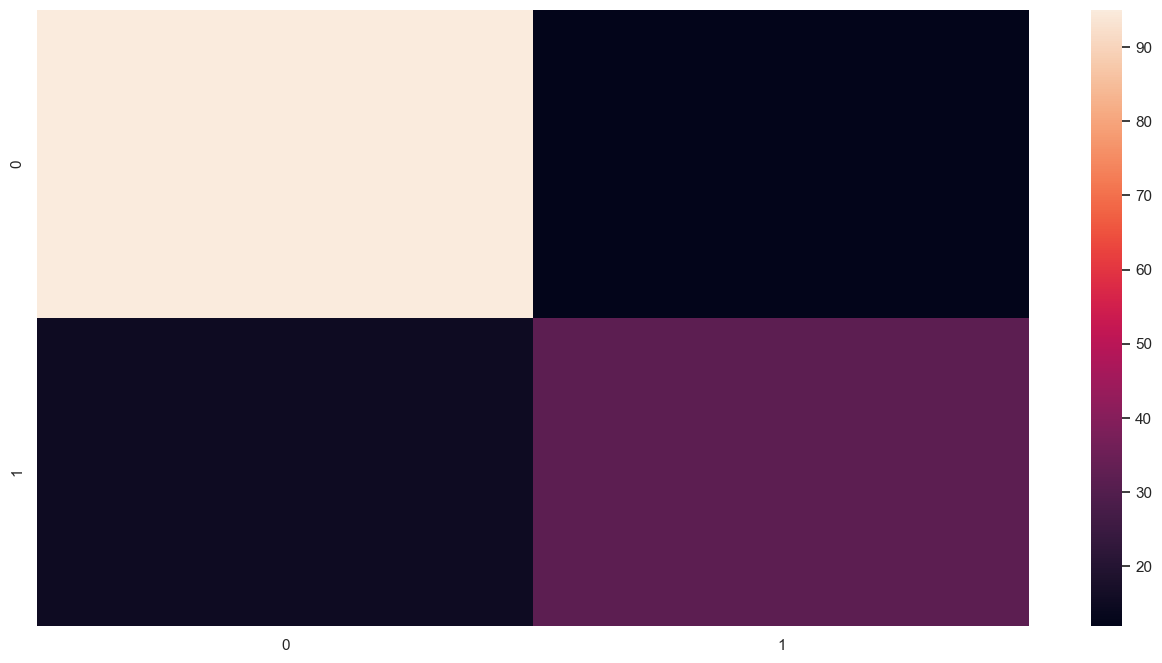

In [88]:
print("Classification Report is:\n",classification_report(y_test,svm_pred))
print("\n F1:\n",f1_score(y_test,knn_pred))
print("\n Precision score is:\n",precision_score(y_test,knn_pred))
print("\n Recall score is:\n",recall_score(y_test,knn_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,svm_pred))

## D. Decision Tree 

In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=42)

In [90]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [5, 10, 20,25],
    'min_samples_leaf': [10, 20, 50, 100,120],
    'criterion': ["gini", "entropy"]
}

In [91]:
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [92]:
best_model=grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 40 candidates, totalling 160 fits


In [93]:
dt_pred=best_model.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.80      0.94      0.86       107
         1.0       0.78      0.45      0.57        47

    accuracy                           0.79       154
   macro avg       0.79      0.70      0.72       154
weighted avg       0.79      0.79      0.77       154


 F1:
 0.5675675675675675

 Precision score is:
 0.7777777777777778

 Recall score is:
 0.44680851063829785

 Confusion Matrix:



<Axes: >

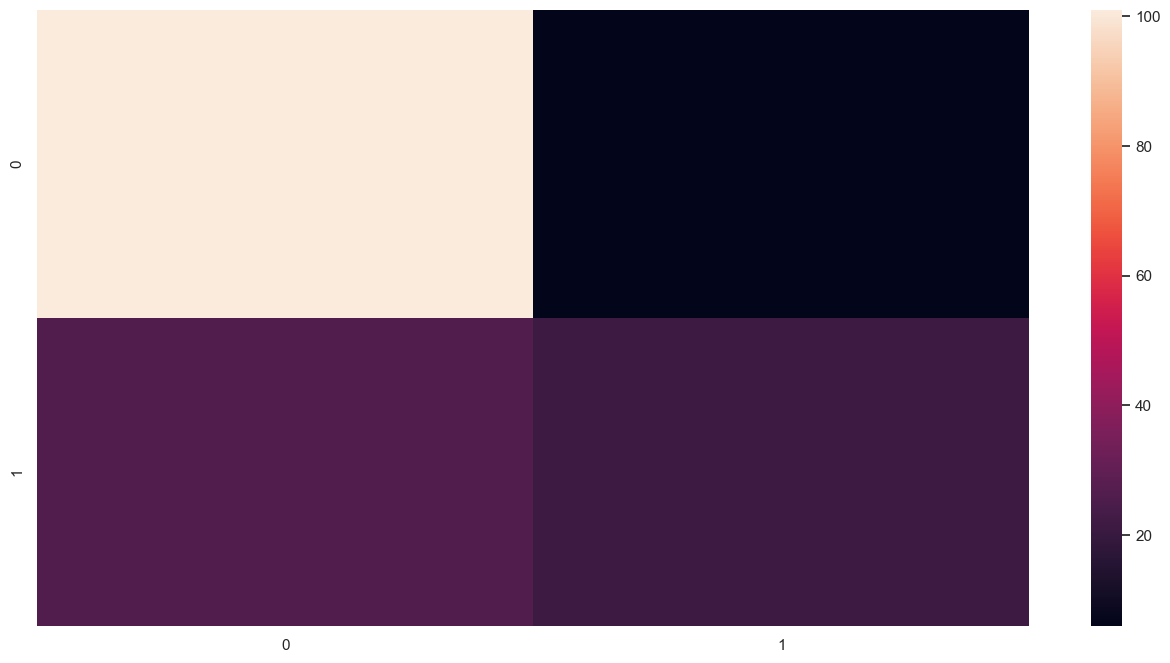

In [94]:
print("Classification Report is:\n",classification_report(y_test,dt_pred))
print("\n F1:\n",f1_score(y_test,dt_pred))
print("\n Precision score is:\n",precision_score(y_test,dt_pred))
print("\n Recall score is:\n",recall_score(y_test,dt_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,dt_pred))

## E. Random Forest :- 
The "forest" references a collection of uncorrelated decision trees, which are then merged together to reduce variance and create more accurate data predictions.

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [96]:
# define models and parameters
model = RandomForestClassifier()
n_estimators = [1800]
max_features = ['sqrt', 'log2']

In [97]:
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

In [98]:
best_model = grid_search.fit(X_train, y_train)

In [99]:
rf_pred=best_model.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.86      0.84      0.85       107
         1.0       0.65      0.68      0.67        47

    accuracy                           0.79       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.79      0.79      0.79       154


 F1:
 0.6666666666666666

 Precision score is:
 0.6976744186046512

 Recall score is:
 0.6382978723404256

 Confusion Matrix:



<Axes: >

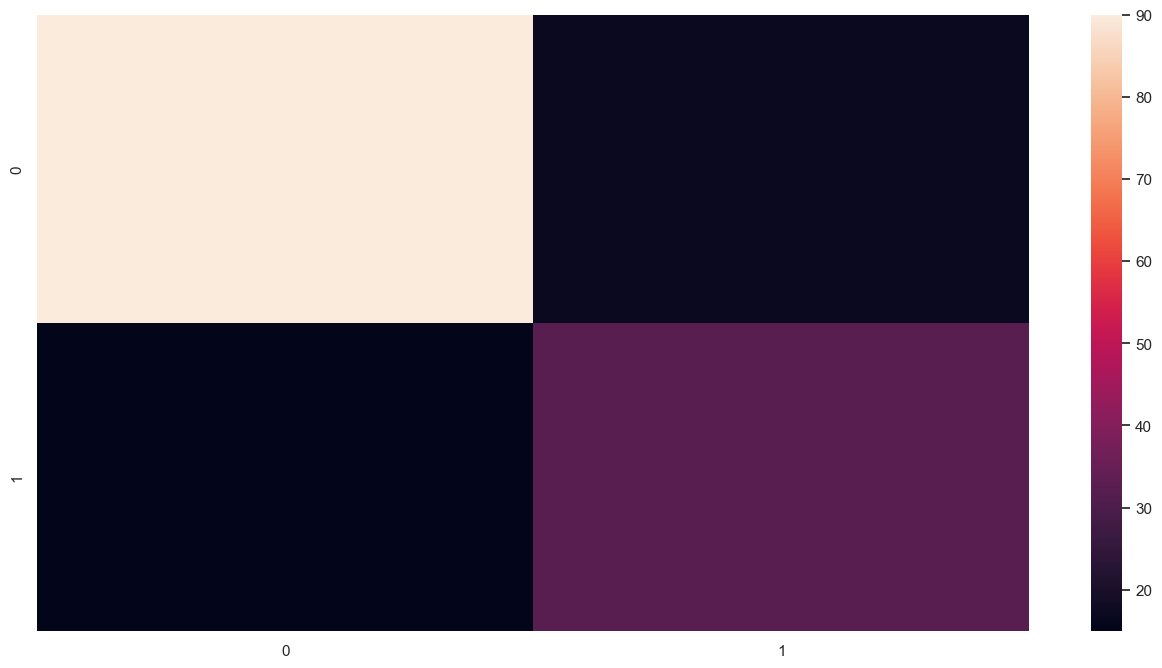

In [100]:
print("Classification Report is:\n",classification_report(y_test,rf_pred))
print("\n F1:\n",f1_score(y_test,knn_pred))
print("\n Precision score is:\n",precision_score(y_test,knn_pred))
print("\n Recall score is:\n",recall_score(y_test,knn_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,rf_pred))

## F. Logistic Regression:- 
Logistical regression is selected when the dependent variable is categorical, meaning they have binary outputs, such as "true" and "false" or "yes" and "no." 

Logistic regression does not really have any critical hyperparameters to tune. Sometimes, you can see useful differences in performance or convergence with different solvers (solver).Regularization (penalty) can sometimes be helpful.

After trying to tune this for 4 hours and achieving 0.00003% of increased accuracy, I've given up and didn't apply grid search for Logistic regression. If you have any better method please comment and help me!🥲

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score

In [102]:
reg = LogisticRegression()
reg.fit(X_train,y_train)                         

LogisticRegression()

In [103]:
lr_pred=reg.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.83      0.89      0.86       107
         1.0       0.69      0.57      0.63        47

    accuracy                           0.79       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.79      0.79      0.79       154


 F1:
 0.627906976744186

 Precision score is:
 0.6923076923076923

 Recall score is:
 0.574468085106383

 Confusion Matrix:



<Axes: >

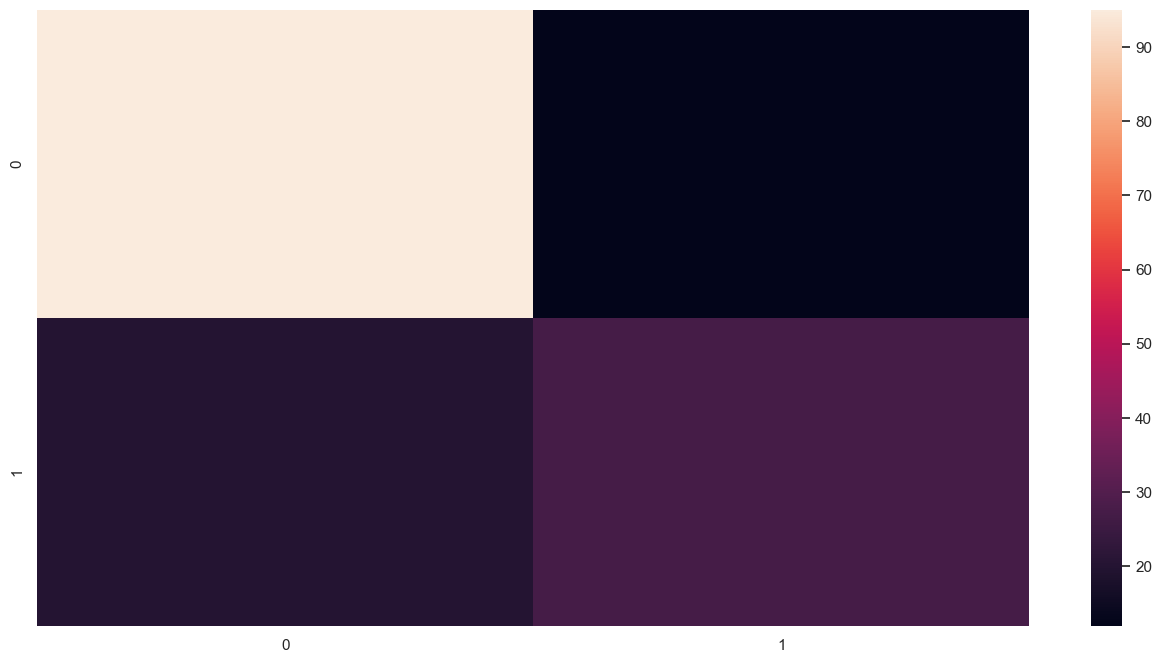

In [104]:
print("Classification Report is:\n",classification_report(y_test,lr_pred))
print("\n F1:\n",f1_score(y_test,lr_pred))
print("\n Precision score is:\n",precision_score(y_test,lr_pred))
print("\n Recall score is:\n",recall_score(y_test,lr_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,lr_pred))